# Programming Assignment 3: K-means clustering



In this programming assignment, you will be implementing the k-means clustering algorithm, which is a popular unsupervised machine learning technique used to segment data into similar clusters. Unlike supervised learning, k-means clustering does not require pre-existing labels for the data.

In this algorithm, the data is partitioned into k clusters, where k is a pre-defined value chosen by the user. The algorithm then iteratively assigns data points to their nearest cluster center, and updates the cluster centers based on the mean of the data points assigned to that cluster. This process continues until the cluster centers no longer change or a maximum number of iterations is reached.

The goal of k-means clustering is to group together similar data points based on their distance from each other, while minimizing the distance between the data points within a cluster. The resulting clusters can be used to gain insights into the underlying structure of the data or to identify anomalous data points that do not fit into any cluster.

To perform k-means clustering, you will be using the household_power_consumption_hourly.csv dataset, which contains hourly measurements of power consumption in a household. The notebook containing your implementation should be located in the same folder as the dataset.

## 1. Let's generate toy dataset to visualize the k means clustering in action:






In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)


In [ ]:
# Generate a dataset with 2000 samples and 5 clusters
X, y = make_blobs(n_samples=2000, centers=5, n_features=2, random_state=20)
X = X* [1,10]

**Task 1**: (5 points)

Please answer the following questions:
1. Often, it is advisable to normalize the data (i.e., scale the feature) before feeding it into the clustering algorithm. What are the reasons for doing so? (Hint: You can examine the data before and after the feature scaling step below.)

Answer:

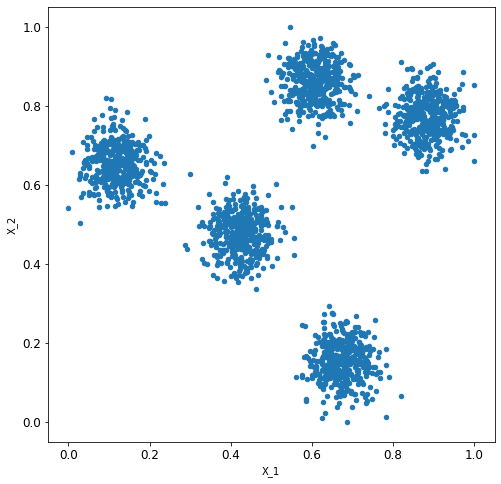

In [ ]:
# Feature scaling: Scale the data using minmax scaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [ ]:
X.shape[0]

2000

**Task 2**: (15 points)

Complete the algorithm code for k-means clustering that is implemented from scratch, without the use of any existing library implementations. Please follow the provided comments for guidance in writing this code.

In [ ]:
# k_means_clustering method should return the final cluster centers and final data labels
def k_means_clustering(X, k, initial_centroids, dist_metric='Euclidian', max_iter=20):
  '''
  Perform k-means clustering on the input data X.
  Parameters:
    X: input data, numpy array of shape (number of samples, number of features)
    k: number of clusters
    initial_centroids: a numpy array of shape (k, number of features) with initial values of the centroids specified by the user
    dist_metric: distance metric to use for clustering, default is 'Euclidian'
    max_iter: maximum number of iterations for the algorithm, default is 10
  Returns:
    new_centroids: a numpy array of shape (k, number of features) with updated centroids
    labels: a numpy array of shape (number of samples, ) with cluster label ranging from 0 to k-1 for each input data point
  '''

  new_centroids = initial_centroids
  old_centroids = initial_centroids
  labels = []
  for i in range(max_iter):
    labels = []
    #STUDENT CODE HERE:
    # Assign each data point to the closest centroid based on dis_metric and populate labels for each data points
    for j in range (X.shape[0]):
      dist = old_centroids - X[j]
      norms = np.linalg.norm(dist, axis=1)
      #print(norms)
      cluster_index = np.argmin(norms)
      #print(cluster_index)
      labels.append(cluster_index)
      #print(labels)
    #Update centroids based on new cluster assignments, and store the old centroids before assigning new values.
    
    copy_cent = old_centroids.copy()
    #print(copy_cent)
    for l in range(k):  
      indices = [m for m, x in enumerate(labels) if x == l]
    #  print(indices)
      if indices:
        new_centroids[l] = np.mean(X[(indices)],axis = 0)# mean by columns, 
        print(new_centroids) 
      else:
        pass      
    # Stop if the centroids haven't moved (i.e break if updated centroids are same as old centroids)
    old_centroids = new_centroids
    #print(new_centroids)
    if np.all(new_centroids == copy_cent):   
      break

  return new_centroids, labels
    

To evaluate the quality of our clustering results, we will use the Silhouette score, which measures the similarity of each data point to its own cluster compared to other clusters. This score is calculated by assigning a value to each data point based on its proximity to other data points within its cluster and its distance from data points in neighboring clusters. The Silhouette score can be calculated as 

Silhouette Score = (b-a)/max(a,b)

where 
a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

**Task 3**: (Bonus 10 points) 

Below is an implementation of silhouette_score `cal_sil_score_my`. Check if this implementation gives the same value as the one provided by sklearn `cal_sil_score`. If they are not the same, see if you can debug the code. Provide your evaluation plots. 

For the rest, we will use `cal_sil_score` to be consistent with the rest of the results.

In [ ]:
from sklearn.metrics import silhouette_score
def cal_sil_score(X, labels):

    score= silhouette_score(X, labels)

    return score

In [ ]:
from sklearn.metrics import pairwise_distances
# from sklearn.metrics import silhouette_score
import numpy as np

def cal_sil_score_my(X, labels):
    '''
    Calculate the Silhouette score for a given set of data points and cluster labels.
    
    Parameters:
    X (numpy array): A numpy array of shape (n_samples, n_features) representing the data points
    labels (numpy array): A numpy array of shape (n_samples,) representing the cluster labels
    
    Returns:
    silhouette_score (float): The Silhouette score for the given data points and cluster labels
    '''
    
    n_samples = X.shape[0]
    distances = pairwise_distances(X)
    silhouettes = np.zeros(n_samples)
    
    for i in range(n_samples):
        # Calculate the average distance from the current data point to all other points in its cluster
        intra_cluster_dist = np.mean(distances[i][labels == labels[i]])
        
        # Calculate the average distance from the current data point to all points in the nearest neighboring cluster
        other_cluster_dist = np.min([np.mean(distances[i][labels != label]) for label in set(labels) if label != labels[i]])
        
        # Calculate the Silhouette score for the current data point
        silhouettes[i] = (other_cluster_dist - intra_cluster_dist) / max(intra_cluster_dist, other_cluster_dist)
    
    # Calculate the overall Silhouette score
    silhouette_score = np.mean(silhouettes)

    return silhouette_score

**Task 4**: (10 points) 

To perform the clustering process, we will deine a `perform_clustering` method. This method will initialize the initial cluster centers, find the final centroids using the `k_means_clustering` method defined above, and calculate the Silhouette score using the `cal_sil_score` function. After performing all these tasks, the method should return the Silhouette score.

For your task: implement an initialization method that randomly choose k different points in the dataset X as initial centroids. (5 points)

Also, please answer the following questions (5 points): 

Is the k_means_Clustering algorithm sensitive to initial centroids? Explain.  Also, apart from random initialization, what other options are there for initialization?  Describe another option (do not need to implement in code). (5 points)

In [ ]:
def perform_clustering(X, k, dist_metric='Euclidian'):
  '''

   Parameters:
    X: input data, numpy array of shape (number of samples, number of features)
    k: number of clusters
    dist_metric: distance metric to use for clustering, default is 'Euclidian'

  Returns:
    new_centroids: a numpy array of shape (k, number of features) with updated centroids
    score: Silhouette score for the current clustering

  '''

  n_samples, n_features = X.shape

  #STUDENT CODE STARTS HERE
  # Randomly initialize the initial centroids (you can use 'np.random.choice' inbuilt function)
  rand_row = np.random.choice(n_samples, size = k, replace = False)
  initial_centroids = X[rand_row]
  #STUDENT CODE ENDS HERE

  #Find the cluster centers using the k_means_clustering function defined above.
  new_centroids, labels = k_means_clustering(X, k, initial_centroids,dist_metric, 20)

  #Evaluate the quality of the clusters by calculating the Silhouette score using the cal_sil_score function defined above.
  score = cal_sil_score(X,labels)

  
  return new_centroids, score

In [ ]:
# ploting sil score for different k values
def plotting_scores(k_set,sil_scores):
  plt.plot(k_set, sil_scores)
  plt.xlabel('# of clusters')
  plt.ylabel('sil_scores')
  plt.title('# of clusters vs sil_score')
  plt.show()

Write the code to integrate all the steps and execute the clustering algorithm for k=2 and k=3. Observe and report the resulting Silhouette scores.

In [ ]:
# find the final cluster centers and sil_scores for your clusterings using 'perform_clustering' method defined above
final_2_centroids, score_2_clusters = perform_clustering(X,2,20)
final_3_centroids, score_3_clusters = perform_clustering(X,3,20)
# print(score_2_clusters, score1)

[[0.40589466 0.42858751]
 [0.6373888  0.85538943]]
[[0.40589466 0.42858751]
 [0.74427724 0.81655836]]
[[0.40589466 0.42858751]
 [0.74427724 0.81655836]]
[[0.40589466 0.42858751]
 [0.74427724 0.81655836]]
[[0.5799048  0.27686141]
 [0.62371    0.87521354]
 [0.36986121 0.50486856]]
[[0.5799048  0.27686141]
 [0.74427724 0.81655836]
 [0.36986121 0.50486856]]
[[0.5799048  0.27686141]
 [0.74427724 0.81655836]
 [0.18591958 0.62039219]]
[[0.58703262 0.26669419]
 [0.74427724 0.81655836]
 [0.18591958 0.62039219]]
[[0.58703262 0.26669419]
 [0.74398773 0.81629134]
 [0.18591958 0.62039219]]
[[0.58703262 0.26669419]
 [0.74398773 0.81629134]
 [0.19762241 0.61424975]]
[[0.60229272 0.24681944]
 [0.74398773 0.81629134]
 [0.19762241 0.61424975]]
[[0.60229272 0.24681944]
 [0.74427724 0.81655836]
 [0.19762241 0.61424975]]
[[0.60229272 0.24681944]
 [0.74427724 0.81655836]
 [0.2178267  0.602646  ]]
[[0.62812133 0.2135601 ]
 [0.74427724 0.81655836]
 [0.2178267  0.602646  ]]
[[0.62812133 0.2135601 ]
 [0.7442772

**Task 5**: (5 points)

As it's often difficult to determine the appropriate number of clusters in our data, we will conduct a grid search for k ranging from 2 to 10 clusters. Afterward, we'll plot the Silhouette scores against k. Based on this, what is the optimal value for k? Use `plotting_scores` provided above to generate the plot and paste it to your solution PDF.

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[[0.11666796 0.61616809]
 [0.67449813 0.15403435]
 [0.74774059 0.81704196]
 [0.42109011 0.47021673]
 [0.12458833 0.69945087]
 [0.47155517 0.62963787]]
[[0.11666796 0.61616809]
 [0.67449813 0.15403435]
 [0.74925451 0.81715513]
 [0.42109011 0.47021673]
 [0.12458833 0.69945087]
 [0.47155517 0.62963787]]
[[0.11666796 0.61616809]
 [0.67449813 0.15403435]
 [0.74925451 0.81715513]
 [0.42190826 0.47194011]
 [0.12458833 0.69945087]
 [0.47155517 0.62963787]]
[[0.11666796 0.61616809]
 [0.67449813 0.15403435]
 [0.74925451 0.81715513]
 [0.42190826 0.47194011]
 [0.12236765 0.69718507]
 [0.47155517 0.62963787]]
[[0.11666796 0.61616809]
 [0.67449813 0.15403435]
 [0.74925451 0.81715513]
 [0.42190826 0.47194011]
 [0.12236765 0.69718507]
 [0.48630899 0.67295683]]
[[0.1191335  0.61445496]
 [0.67449813 0.15403435]
 [0.74925451 0.81715513]
 [0.42190826 0.47194011]
 [0.12236765 0.69718507]
 [0.48630899 0.67295683]]
[[0.1191335  0.61445496]
 [0.67449813 0.1540343

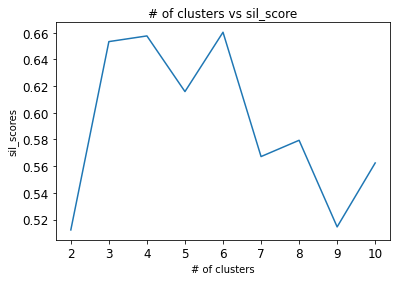

In [ ]:
k_set=[2,3,4,5,6,7,8,9,10] # students would populate
sil_scores = [] # to be populated with corresponding silhouette_scores
#STUDENT CODE HERE:
#Evaluate the Silhouette scores for different k values using the perform_Clustering method defined above.

for k in k_set:
  new_centroids, score = perform_clustering(X, k, dist_metric='Euclidian')
  sil_scores.append(score)

#Create a plot of the k values versus the Silhouette scores using the plotting_scores function.
# ploting sil score for different k values
plotting_scores(k_set,sil_scores)

#STUDENT CODE ENDS HERE


**Task 6**: (10 points)

In practice, it has been noticed that the initial cluster centers can significantly influence the clustering outcomes. Try out various centroid initialization techniques and determine which method produces better results than random initialization. It's essential to rewrite the perform_clustering function with your preferred initialization method, while the remaining part of the function should remain the same. For this comparison, select a fixed number of clusters, k = 5.

Describe your method. Please report the Silhouette scores, along with a visualization of the clusters based on the random initialization and your method for comparison.

In [ ]:
def perform_clustering_new(X, k, dist_metric='Euclidian'):
    k = 5
    n_samples, n_features = X.shape
    # kmeans++ initialization used
    # Select the first centroid randomly from the data points
    centroids = [X[np.random.choice(n_samples)]]
    
    # Select the remaining k-1 centroids using K-means++ initialization
    for i in range(k-1):
        # Compute the distances of each data point to the nearest centroid
        distances = np.array([min([np.linalg.norm(x-c)**2 for c in centroids]) for x in X])
        
        # Choose the data point with the highest distance as the next centroid
        next_centroid = X[np.argmax(distances)]
        centroids.append(next_centroid)
        
    initial_centroids = np.array(centroids)

    #Find the cluster centers using the k_means_clustering function defined above.
    new_centroids, labels = k_means_clustering(X, k, initial_centroids,dist_metric, 20)

    #Evaluate the quality of the clusters by calculating the Silhouette score using the cal_sil_score function defined above.
    score = cal_sil_score(X,labels)

  
    return new_centroids, score

In [ ]:
centroids_kpp, score_pp = perform_clustering_new(X, k=5, dist_metric='Euclidian')
centroids, score = perform_clustering(X,k=5,dist_metric='Euclidian')

[[0.62415172 0.85742323]
 [0.68639514 0.        ]
 [0.         0.54147224]
 [0.47046394 0.43394852]
 [1.         0.66058855]]
[[0.62415172 0.85742323]
 [0.67560404 0.15147411]
 [0.         0.54147224]
 [0.47046394 0.43394852]
 [1.         0.66058855]]
[[0.62415172 0.85742323]
 [0.67560404 0.15147411]
 [0.11935353 0.6543415 ]
 [0.47046394 0.43394852]
 [1.         0.66058855]]
[[0.62415172 0.85742323]
 [0.67560404 0.15147411]
 [0.11935353 0.6543415 ]
 [0.42753744 0.47316188]
 [1.         0.66058855]]
[[0.62415172 0.85742323]
 [0.67560404 0.15147411]
 [0.11935353 0.6543415 ]
 [0.42753744 0.47316188]
 [0.88816385 0.76761034]]
[[0.60712942 0.85942496]
 [0.67560404 0.15147411]
 [0.11935353 0.6543415 ]
 [0.42753744 0.47316188]
 [0.88816385 0.76761034]]
[[0.60712942 0.85942496]
 [0.67449813 0.15403435]
 [0.11935353 0.6543415 ]
 [0.42753744 0.47316188]
 [0.88816385 0.76761034]]
[[0.60712942 0.85942496]
 [0.67449813 0.15403435]
 [0.1198025  0.65427317]
 [0.42753744 0.47316188]
 [0.88816385 0.767

In [ ]:
print('score with kmeans++ initialization ', score_pp)
print('score with random initialization ', score)


score with kmeans++ initialization  0.7474285056583688
score with random initialization  0.5833497084340551


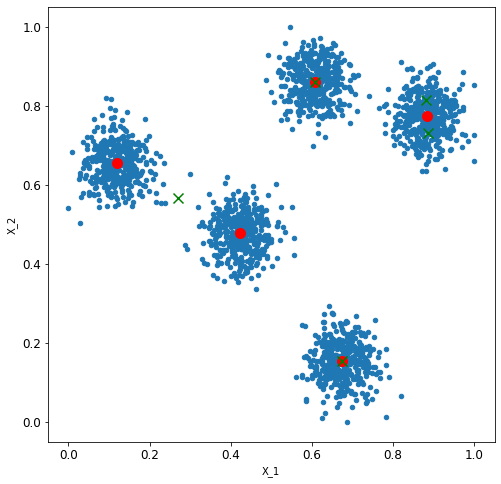

In [ ]:
# Define the initial cluster centroids as a separate array
initial_centroids_pp = centroids_kpp
initial_centroids = centroids

# Create a scatter plot of the scaled data
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')

# Plot the initial cluster centroids with random initialization as green x's
# plot the initial cluster centroids kmeans++ initialization as red points
ax.scatter(initial_centroids_pp[:,0], initial_centroids_pp[:,1], color='red', marker='o', s=100)
ax.scatter(initial_centroids[:,0], initial_centroids[:,1], color='green', marker='x', s=100)

# Set the axis labels and show the plot
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [ ]:
def perform_clustering_new2(X, k, dist_metric='Euclidian'):
  # pick k*2 clusters at random and eliminate the ones that have the min distance with other cluster centers,
  #until k cluster centers remain
  n_samples, n_features = X.shape

  #STUDENT CODE STARTS HERE
  # Randomly initialize k*2 initial centroids 
  rand_row = np.random.choice(n_samples, size = k*2, replace = False)
  initial_centroids = X[rand_row]
  # with this loop, in each iteration eliminate a centroid that has min distance from the one indexed as i.
  #so in first iteration, centroid closest to first centroid is eliminated, in second iteration,
  # centroid closest to second centroid is eliminated and it goes on until k centroids left 
  for i in range(int(len(initial_centroids)/2)):
    dist_centroids = pairwise_distances(initial_centroids)
    min_one_from_first = dist_centroids[i].argsort()
    initial_centroids2 = initial_centroids[0:min_one_from_first[1]]
    initial_centroids3 = initial_centroids[min_one_from_first[1]+1:len(initial_centroids)]
    initial_centroids = np.concatenate((initial_centroids2,initial_centroids3),axis=0)

  new_centroids, labels = k_means_clustering(X, k, initial_centroids,dist_metric, 20)

  #Evaluate the quality of the clusters by calculating the Silhouette score using the cal_sil_score function defined above.
  score = cal_sil_score(X,labels)

  
  return new_centroids, score

In [ ]:
centroids_2, score_2 = perform_clustering_new2(X, k=5, dist_metric='Euclidian')
centroids, score = perform_clustering(X,k=5,dist_metric='Euclidian')

[[0.39075106 0.50501838]
 [0.66113551 0.86273885]
 [0.43347861 0.48312743]
 [0.19111873 0.65739205]
 [0.94251419 0.77347746]]
[[0.39075106 0.50501838]
 [0.61019376 0.85862779]
 [0.43347861 0.48312743]
 [0.19111873 0.65739205]
 [0.94251419 0.77347746]]
[[0.39075106 0.50501838]
 [0.61019376 0.85862779]
 [0.59035949 0.26618721]
 [0.19111873 0.65739205]
 [0.94251419 0.77347746]]
[[0.39075106 0.50501838]
 [0.61019376 0.85862779]
 [0.59035949 0.26618721]
 [0.1198025  0.65427317]
 [0.94251419 0.77347746]]
[[0.39075106 0.50501838]
 [0.61019376 0.85862779]
 [0.59035949 0.26618721]
 [0.1198025  0.65427317]
 [0.88453336 0.77255224]]
[[0.42244898 0.47853093]
 [0.61019376 0.85862779]
 [0.59035949 0.26618721]
 [0.1198025  0.65427317]
 [0.88453336 0.77255224]]
[[0.42244898 0.47853093]
 [0.60712942 0.85942496]
 [0.59035949 0.26618721]
 [0.1198025  0.65427317]
 [0.88453336 0.77255224]]
[[0.42244898 0.47853093]
 [0.60712942 0.85942496]
 [0.67324277 0.15575047]
 [0.1198025  0.65427317]
 [0.88453336 0.772

In [ ]:
print('score with selecting multiple centers and pruning initialization ', score_2)
print('score with random initialization ', score)


score with selecting multiple centers and pruning initialization  0.7474285056583688
score with random initialization  0.5728770240756165


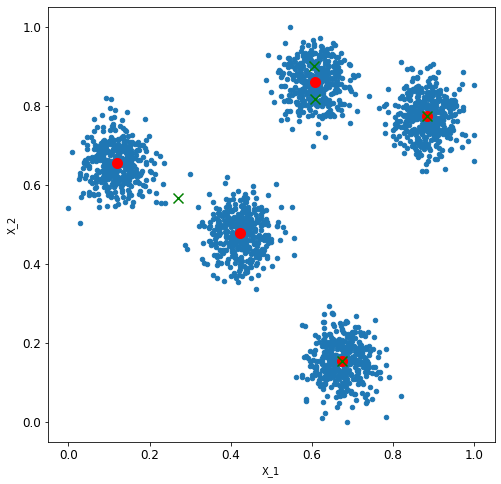

In [ ]:
# Define the initial cluster centroids as a separate array
initial_centroids_2 = centroids_2
initial_centroids = centroids

# Create a scatter plot of the scaled data
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')

# Plot the initial cluster centroids with random initialization as green x's
# plot the initial cluster centroids with pruning initialization as red points
ax.scatter(initial_centroids_2[:,0], initial_centroids_2[:,1], color='red', marker='o', s=100)
ax.scatter(initial_centroids[:,0], initial_centroids[:,1], color='green', marker='x', s=100)

# Set the axis labels and show the plot
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

## **Household power consumption pattern clustering**
Now, let's move on to a real-world dataset. The `Household_power_consumption_hourly.csv` file contains data for 1457 days of active energy consumption every hour (in watt hours) in a household by various electrical equipment. The original dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

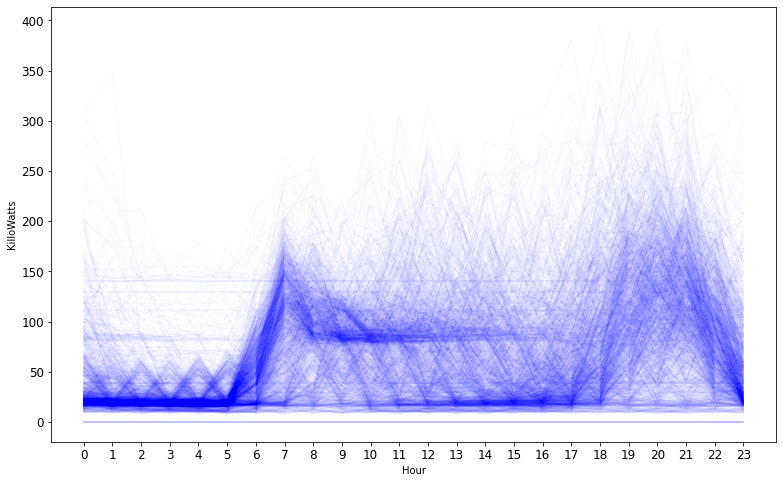

In [ ]:
df = pd.read_csv('household_power_consumption_hourly.csv')
df.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.02)
plt.xlabel('Hour')
plt.ylabel('KilloWatts')
plt.xticks(range(0, 24), range(0, 24))

plt.show()

In [ ]:
df.head(20)

,Global_active_power,Global_active_power.1,Global_active_power.2,Global_active_power.3,Global_active_power.4,Global_active_power.5,Global_active_power.6,Global_active_power.7,Global_active_power.8,Global_active_power.9,...,Global_active_power.14,Global_active_power.15,Global_active_power.16,Global_active_power.17,Global_active_power.18,Global_active_power.19,Global_active_power.20,Global_active_power.21,Global_active_power.22,Global_active_power.23
0,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,...,14.000,15.000,16.000,17.000,18.000,19.000,20.000,21.000,22.000,23.000
1,112.948,200.964,95.236,99.732,132.946,119.804,78.198,97.202,113.434,152.944,...,125.558,179.124,199.562,204.406,221.826,174.504,201.690,182.446,91.080,26.264
2,16.582,18.798,17.068,18.596,61.580,17.610,36.600,147.026,124.928,97.760,...,103.982,107.058,116.958,129.294,144.152,156.870,183.034,130.184,104.328,92.836
3,50.228,21.182,19.634,18.498,19.670,18.400,47.780,107.138,232.742,97.066,...,18.128,25.282,82.328,126.690,132.282,110.526,176.432,86.572,43.200,23.022
4,27.590,15.520,47.062,18.602,17.340,15.762,17.016,91.598,175.056,83.132,...,77.694,16.868,28.106,34.410,170.210,194.918,214.528,218.764,183.538,142.906
5,92.152,83.878,76.494,18.156,14.804,17.442,17.740,76.828,93.782,154.548,...,61.434,18.444,81.604,105.158,146.598,131.828,146.242,58.936,16.816,16.226
6,16.016,16.320,16.058,16.432,15.856,48.410,28.778,103.392,164.664,113.778,...,48.934,87.098,94.272,89.808,161.218,236.290,212.164,272.920,183.904,145.152
7,101.894,103.368,102.046,106.292,113.496,133.746,98.962,241.402,251.450,194.784,...,225.478,242.946,260.946,327.152,232.764,247.070,250.884,197.306,259.676,333.748
8,241.680,196.542,138.182,96.406,94.566,97.914,113.712,88.584,85.666,163.540,...,82.292,185.810,120.428,101.190,30.312,27.242,28.446,29.042,28.786,29.180
9,59.974,72.406,26.280,35.398,34.720,37.206,15.844,40.608,156.666,89.608,...,107.024,104.420,232.370,124.308,145.384,97.770,118.628,230.212,252.892,155.534


**Task 7**: (10 points)

Perform K means clustering using `perform_clustering` on this dataset (5 points) and report the optimal number of clusters/consumption patterns based on the Silhouette score (5 points).

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[[0.16941898 0.10076633 0.13312904 0.15837883 0.14104758 0.14757364
  0.16374779 0.27637167 0.38490675 0.4460797  0.35906066 0.39755044
  0.35264646 0.40408691 0.48918163 0.45921063 0.44815014 0.4419025
  0.52438792 0.54663766 0.52854622 0.47486664 0.43710169 0.35723544]
 [0.10817258 0.08215877 0.12123745 0.14203353 0.13001733 0.14644084
  0.28292833 0.48546898 0.43636921 0.42343511 0.25773779 0.22234529
  0.17599001 0.170275   0.14712384 0.12660065 0.13969502 0.15197717
  0.26049338 0.45198683 0.48395939 0.47386142 0.37096701 0.24600557]
 [0.12471875 0.08332028 0.12465315 0.13944202 0.13578152 0.13918242
  0.14113363 0.21170033 0.23596687 0.26437672 0.19374203 0.21592951
  0.21157721 0.25785397 0.28583822 0.27824309 0.30171026 0.28045141
  0.31504739 0.36610731 0.36401585 0.37207867 0.29188224 0.17830105]
 [0.11741328 0.08208451 0.11928074 0.13410798 0.14477418 0.14290993
  0.25642185 0.43893178 0.45769743 0.50157144 0.37885183 0.43498663

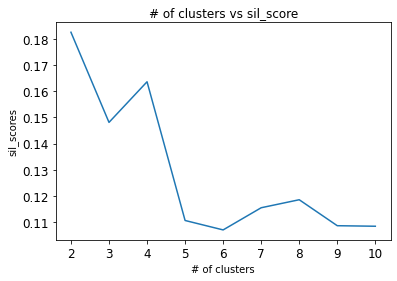

In [ ]:

sil_scores = []
k_set = np.arange(2,11).astype(int)

X = df.values.copy()
#STUDENT CODE STARTS HERE: 
# Feature scaling: Scale the data using minmax scaler
X = sc.fit_transform(X)
for k in k_set:
  new_centroids,score = perform_clustering(X,k,dist_metric = 'Euclidian')
  sil_scores.append(score)
  
plotting_scores(k_set,sil_scores)
#STUDENT CODE ENDS HERE

In [ ]:
new_centroids.shape

(10, 24)

**Task 8**: (5 points)

Utilize the given code below to examine the various clustering outcomes obtained at different k values, and then report your observations. Are they reasonable? Why or why not?


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'hour')

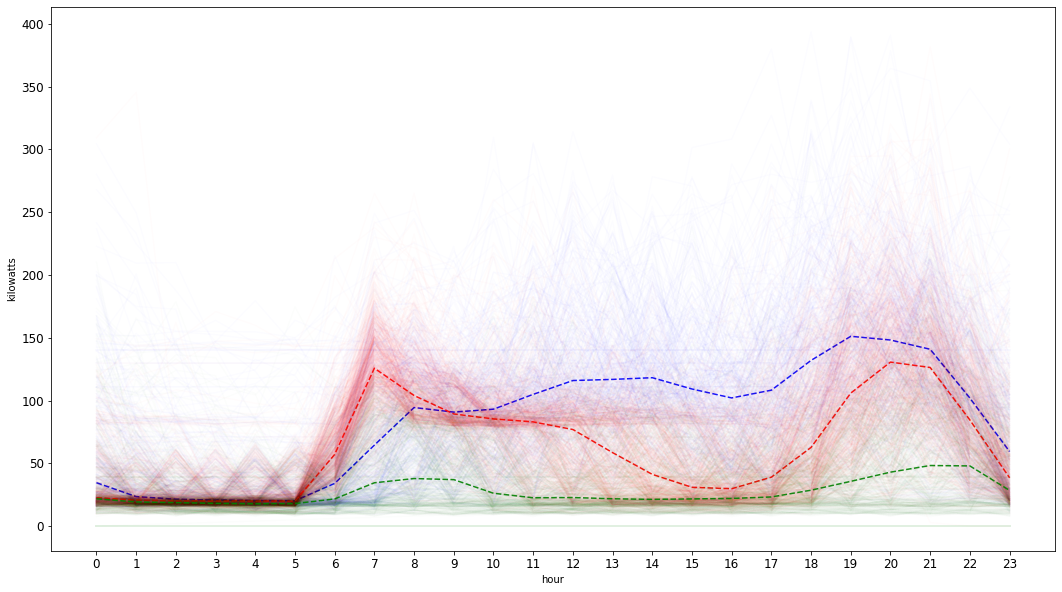

In [ ]:
df = pd.read_csv('household_power_consumption_hourly.csv')
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, name='cluster')
df = df.set_index(cluster_found_sr, append=True )

fig, ax= plt.subplots(1,1, figsize=(18,10))
color_list = ['blue','red','green']
cluster_values = sorted(df.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    df.xs(cluster, level=1).T.plot(
        ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}'
        )
    df.xs(cluster, level=1).median().plot(
        ax=ax, color=color, alpha=0.9, ls='--'
    )

ax.set_xticks(range(0, 24), range(0, 24))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
# ax.legend()

In [ ]:
clusterer = KMeans(n_clusters=2, n_init="auto", random_state=10)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)


In [ ]:
silhouette_avg

0.18043541012811584

In this assignment, we delved into the K-means clustering algorithm, which is an unsupervised method for grouping data into clusters. Our study of this algorithm uncovered the following crucial insights:

K-means clustering is influenced by both the initial cluster configurations. The number of clusters must be determined beforehand. We used the Silhouette score to evaluate the quality of our clusters, but you can also explore other methods such as the Davies Bouldin index.

It's important to keep in mind that there are other clustering techniques, including Hierarchical Class Clustering and Latent Class Clustering. If you're interested, take some time to learn about these approaches and compare them to K-means clustering.

Credit: Hardeep

Edited by Ming Jin